In [ ]:
import fitz  # PyMuPDF
import cv2
import numpy as np
from pyzbar.pyzbar import decode
import os
from PIL import Image
import io


In [ ]:


def decoding(results, page_num, detected_barcodes):
    results[page_num + 1] = []
    print(f"\nPage {page_num+1}:")
    for barcode in detected_barcodes:
        barcode_data = {
            'type': barcode.type,
            'data': barcode.data.decode('utf-8'),
            'rect': barcode.rect
        }
        results[page_num + 1].append(barcode_data)
        print(f"Type: {barcode_data['type']}, Data: {barcode_data['data']}")
        
    return results
def read_barcodes_from_pdf(pdf_path):
    """
    Read all barcodes from all pages of a PDF file.
    """
    pdf_document = fitz.open(pdf_path)
    results = {}

    for page_num in range(pdf_document.page_count):
        page = pdf_document[page_num]

        # Convert PDF page to image
        pix = page.get_pixmap(matrix=fitz.Matrix(300/72, 300/72))  # 300 DPI

        # Convert to format suitable for OpenCV
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        
        # print([pix.width, pix.height])
        img_bytes = io.BytesIO()
        img.save(img_bytes, format='PNG')
        img_bytes.seek(0)
        
        # Convert to numpy array for OpenCV processing
        img_arr = np.frombuffer(img_bytes.read(), np.uint8)
        img = cv2.imdecode(img_arr, cv2.IMREAD_COLOR)

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # print(gray.shape)
        crop_gray = gray[0:300, 2800:pix.width]

        # Apply image processing
        # blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        # thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        
        cv2.imwrite(r'D:\prawploy.p\scraping\extend_work\Barcode_Reader_PDF\cut_barcode\pagenum_'+str(page_num+1)+'.png', crop_gray)
        
        # if page_num+1 == 35:
        #     break
        
        # Detect barcodes
        detected_barcodes = decode(crop_gray)

        if detected_barcodes:
            results = decoding(results, page_num, detected_barcodes)
                
        else:
            
            
            kernel = np.ones((3, 3), np.uint8) 
            crop_gray = cv2.dilate(crop_gray, kernel=kernel)

            # Apply image processing
            # blurred = cv2.GaussianBlur(gray, (5, 5), 0)
            # thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
            
            cv2.imwrite(r'D:\prawploy.p\scraping\extend_work\Barcode_Reader_PDF\cut_barcode\pagenum_'+str(page_num+1)+'.png', crop_gray)

            # Detect barcodes
            detected_barcodes = decode(crop_gray)

            if detected_barcodes:
                results = decoding(results, page_num, detected_barcodes)
                    
            else:
                gray = cv2.rotate(gray, cv2.ROTATE_180)
                crop_gray = gray[0:500, 2800:pix.width]
                
                cv2.imwrite(r'D:\prawploy.p\scraping\extend_work\Barcode_Reader_PDF\cut_barcode\pagenum_'+str(page_num+1)+'.png', crop_gray)

                # Detect barcodes
                detected_barcodes = decode(crop_gray)

                if detected_barcodes:
                    results = decoding(results, page_num, detected_barcodes)
                        
                else:
                    gray = cv2.rotate(gray, cv2.ROTATE_180)
                    crop_gray = gray[0:500, 2800:pix.width]
                    print(f"\nPage {page_num+1}: No barcodes found in the document.")
                
        
            

    pdf_document.close()
    
    # return results

# Function to handle file upload and processing
def process_uploaded_pdf():
    filename = r'D:\prawploy.p\scraping\extend_work\Barcode_Reader_PDF\Interface_error_66-67_med.pdf'  # This will open the file upload dialog


    # Process the PDF
    print(f"\nProcessing {filename}...")
    read_barcodes_from_pdf(filename)



# Run this cell to process PDFs
print("Click 'Choose Files' to upload your PDF(s)...")
process_uploaded_pdf()

Click 'Choose Files' to upload your PDF(s)...

Processing D:\prawploy.p\scraping\extend_work\Barcode_Reader_PDF\Interface_error_66-67_med.pdf...

Page 1:
Type: CODE128, Data: IN670028

Page 2:
Type: CODE128, Data: IN670029

Page 3:
Type: CODE128, Data: IN670030

Page 4:
Type: CODE128, Data: IN670032

Page 5: No barcodes found in the document.

Page 6:
Type: CODE128, Data: IN670033

Page 7:
Type: CODE128, Data: IN670034

Page 8:
Type: CODE128, Data: IN670035

Page 9:
Type: CODE128, Data: IN670036

Page 10:
Type: CODE128, Data: IN670037

Page 11:
Type: CODE128, Data: IN670038

Page 12: No barcodes found in the document.

Page 13:
Type: CODE128, Data: IN670039

Page 14: No barcodes found in the document.

Page 15: No barcodes found in the document.

Page 16:
Type: CODE128, Data: IN670040

Page 17:
Type: CODE128, Data: IN670042

Page 18:
Type: CODE128, Data: IN670043

Page 19: No barcodes found in the document.

Page 20:
Type: CODE128, Data: ST670326

Page 21:
Type: CODE128, Data: ST670329

In [3]:
import fitz  # PyMuPDF
import cv2
import numpy as np
from pyzbar.pyzbar import decode
import os
from PIL import Image
import io


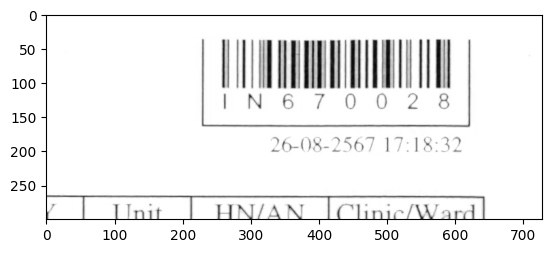

In [59]:
import matplotlib.pyplot as plt
image = r'D:\prawploy.p\scraping\extend_work\Barcode_Reader_PDF\cut_barcode\pagenum_1.png'
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3, 3), np.uint8) 
image = cv2.dilate(image, kernel=kernel)


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [60]:
detected_barcodes = decode(image)

if detected_barcodes:
    for barcode in detected_barcodes:
        barcode_data = {
            'type': barcode.type,
            'data': barcode.data.decode('utf-8'),
            'rect': barcode.rect
        }
        print(f"Type: {barcode_data['type']}, Data: {barcode_data['data']}")

In [51]:
detected_barcodes

[Decoded(data=b'ST670358', type='CODE128', rect=Rect(left=241, top=60, width=325, height=2), polygon=[Point(x=241, y=61), Point(x=566, y=62), Point(x=566, y=60)], quality=3, orientation='UP')]